<div dir="rtl">

# <center> به نام خدا </center>


# <center> تمرین درس پردازش گفتار </center>

## <center> **استاد:** _دکتر بختیاری_ </center>

## <center> **دانشجو:** _سینا بهنام_ </center>

## <center> **تابستان 1400** </center>

</div>

<div dir="rtl">

این پروژه با استفاده از `jupyter notebook` در زبان برنامه نویسی پایتون پیاده سازی شده است .

 فایل کد ها و اصوات ضبط شده هم در این ادرس میباشد[اینجا](https://github.com/sina-behnam/DTW)

###  شرح پروژه : 
در این پروژه با بکار گرفتن از ابزار `DTW` میزان تفاوت دو سیگنال صدا به صورت خام و بصورت برداری از ویژگی ها مورد بررسی قرار گرفته است . 

ابتدا کتابخانه ها و ماژول های لازم را فراخوانی میکنیم.
</div>

In [44]:
import numpy as np
import librosa
import glob
import matplotlib.pyplot as plt
import librosa.display as display
import pandas as pd
import xlsxwriter
import xlrd
import openpyxl
import sklearn.preprocessing

%matplotlib inline

<div dir="rtl">
ابتدا قبل از اماده سازی داده به یکی از مراحل ان توجه میکنیم که در ان سکوت هایی که باعث افزایش طول صوت و همچنین افزایش میزان 

پردازش میشود جلوگیری میکنیم که برای ان از ابزار `trim` استفاده شده است .

در قسمت پایین صوتی اصلی را با حالت صوت بدون سکوت مقایسه شده است که نشان میدهد طول کاهش پیدا کرده است.

همچنین با استفاده از یک پنجره به طول `30ms` این بررسی وجود سکوت انجام گرفته شده است

و تمامی اصواتی که با قدرت زیر `10db` وجود داشته اند حذف شده است 
</div>

duration :  0.9218
trimmed duration :  0.6086
the interval of original signal corresponding to the non-silent region would start at :  440  and end at :  13860


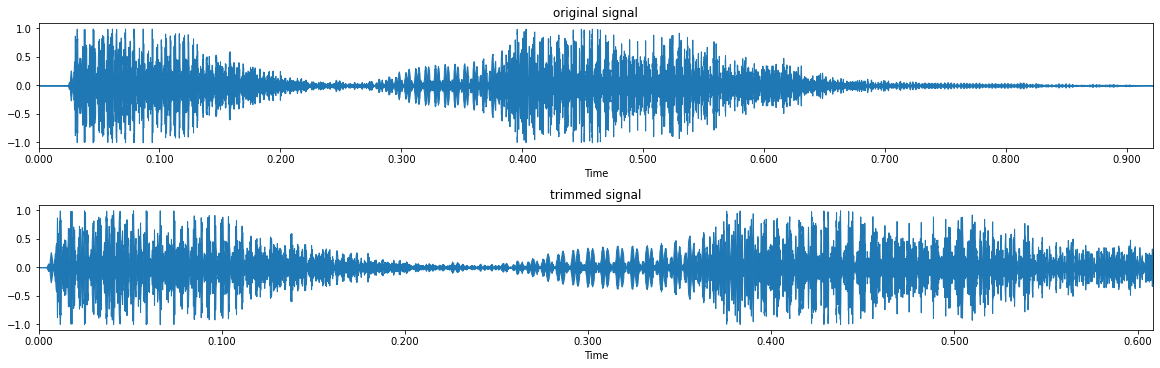

In [45]:
# trimming analysis
signal,samplerate = librosa.load('data/last_name_by_myself/lastname_001.wav',sr=22050,mono=True)

fig, ax = plt.subplots(2,1,constrained_layout=True)

fig.set_size_inches(16,5)

display.waveplot(signal,sr=22050,ax=ax[0])
ax[0].set(title="original signal")

print("duration : ",round(librosa.get_duration(signal),4))

# frame length : The number of samples per analysis frame (30ms = 661 samples) ~= N
# hop length : The number of samples between analysis frames (10ms = 220 samples) ~= M
# top_db : The threshold (in decibels) below reference to consider as silence

signal_trimmed,index = librosa.effects.trim(signal,top_db=10,frame_length=int(30e-3*samplerate),hop_length=int(10e-3*samplerate))

display.waveplot(signal_trimmed,sr=22050,ax=ax[1])
ax[1].set(title="trimmed signal")

print("trimmed duration : ",round(librosa.get_duration(signal_trimmed),4))

print("the interval of original signal corresponding to the non-silent region would start at : ",index[0]," and end at : ",index[1])

<div dir="rtl">

#### توصیف داده : دادهایی که در این پروژه استفاده شده اند به قسمت کلی شامل صدا `سینا` و صدا `بهنام` تشکیل شده است که توسط دوشخص متفاوت ادا شده اند

هر یک از اشخاص ده بار صدا `سینا` ضبط شده است و ده بار `بهنام` و هر کدام دو به دو تحلیل شده اند و در نهایت میزان تفاوت ان با یک دیگر مقایسه شده است.
</div>

record number :  10


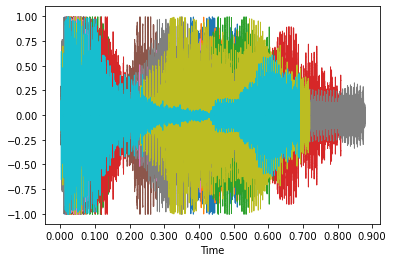

In [46]:
data = 'data/'
lastname_bymyself_folder = data + 'last_name_by_myself/'
lastname_bymyself_file = glob.glob(lastname_bymyself_folder+'*.wav')

lastname_bymyself = []
for lastname_path in lastname_bymyself_file:
    signal,samplerate = librosa.load(lastname_path,sr=22050,mono=True)
    signal,index = librosa.effects.trim(signal,top_db=10,frame_length=int(30e-3*samplerate),hop_length=int(10e-3*samplerate))
    display.waveshow(signal)
    lastname_bymyself.append([signal,samplerate])

print("record number : ",len(lastname_bymyself))

<div dir="rtl">

تابع زیر میزان `DTW` بین دو فایل صوتی را تشخیص میدهد و در نهایت بهترین فاصله را به صورت یک مجموعه در قالب جدول نمایش میدهد

</div>

In [47]:
def signal_dtw_calculation(y1,y2,is_equal=False,dtw_weight_path=None): 

    if(dtw_weight_path):
        return pd.read_excel(dtw_weight_path,index_col=0)
    
    record_number_y1 = len(y1)
    record_number_y2 = len(y2)

    if(is_equal):

        distances = np.zeros((record_number_y1, record_number_y2))
        for i in range(record_number_y1):
            for j in range(i+1, record_number_y2):
                x_1, fs = y1[i]
                x_2, fs = y2[j]
                D, wp = librosa.sequence.dtw(x_1, x_2)
                best_cost = D[-1, -1]
                distances[i][j] = round(best_cost, 3)

        distances = pd.DataFrame(distances)

        return distances


    distances = np.zeros((record_number_y1, record_number_y2))
    for i in range(record_number_y1):
        for j in range(record_number_y2):
            x_1, fs = y1[i]
            x_2, fs = y2[j]
            D, wp = librosa.sequence.dtw(x_1, x_2)
            best_cost = D[-1, -1]
            distances[i][j] = round(best_cost, 3)

    distances = pd.DataFrame(distances)
    
    return distances

<div dir="rtl">

میزان شباهت ادای صوت خام `بهنام` توسط خودم

همان طور که مشاهده میشود میزان `DTW` سیگنال زیاد میباشد و به خوبی قابل تفکیک نمیباشند 
</div>

In [48]:

signal_distances_lastname_lastname_bymyself = signal_dtw_calculation(lastname_bymyself,lastname_bymyself,is_equal=True,dtw_weight_path=lastname_bymyself_folder+'output/signal_distances_lastname_lastname_bymyself.xlsx')
signal_distances_lastname_lastname_bymyself

,0,1,2,3,4,5,6,7,8,9
0,0,848.716,1008.144,1240.776,1305.755,1243.724,1040.890,1315.072,1480.996,1329.427
1,0,0.000,1014.244,1213.117,1212.691,1220.273,964.352,1273.261,1392.649,1297.726
2,0,0.000,0.000,1320.593,1439.262,1394.256,1158.300,1369.722,1490.365,1436.390
3,0,0.000,0.000,0.000,1125.506,1352.069,1253.510,1393.819,1424.594,1107.705
4,0,0.000,0.000,0.000,0.000,874.804,908.985,1336.700,1556.205,846.317
5,0,0.000,0.000,0.000,0.000,0.000,933.461,1653.566,1768.868,1143.542
6,0,0.000,0.000,0.000,0.000,0.000,0.000,1218.390,1429.339,1082.597
7,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1408.016,1472.040
8,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1580.603
9,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


<div dir="rtl">

در شکل زیر سعی شده است تا اطلاعاتی از نمای کلی از مقدار تفاوت بین سیگنال نمونه نشان میدهد و در نمودار اول به صورت جبعی و در نمودار دوم به صورت نمایش رنگدار که هر نمونه نسبت به دیگر با چه شدتی با هم متشابه هستند و هر چه این مقدار کمتر باشد میزان شباهت بین نمونه ها بیشتر است .
</div>

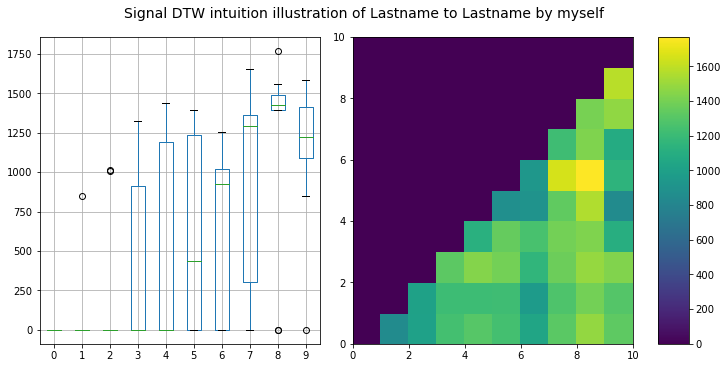

In [49]:
fig, ax = plt.subplots(1,2,constrained_layout=True)

fig.set_size_inches(10,5)
fig.suptitle("Signal DTW intuition illustration of Lastname to Lastname by myself", fontsize=14)

signal_distances_lastname_lastname_bymyself.boxplot(ax=ax[0])

img = ax[1].pcolormesh(signal_distances_lastname_lastname_bymyself.to_numpy())
fig.colorbar(img, ax=[ax[1]])

<div dir="rtl">

به علت حجم بالای محاسبات سیگنال خام نتیجه ان یک خروجی `exel` گرفته میشود تا در دفعات بعد نیاز به اجرا الگوریتم نباشد .
</div>

In [50]:
# repoting out of dwt 
signal_distances_lastname_lastname_bymyself.to_excel(lastname_bymyself_folder+'output/signal_distances_lastname_lastname_bymyself.xlsx', engine='xlsxwriter')

<div dir="rtl">

همان طور که مشاهده شد میزان شباهت به شکل صحیح و قابل تفکیکی انجام نشده و لذا نیاز است با استفاده از استخراج بعضی از ویژگی های صوت انرا قابل تشخیص تر برای سیستم کنیم 

## ویژگی های استفاده شده :
1. MFCC
2. مشتق اول **MFCC**
3. مشتق دوم **MFCC**
4. عبور از صفر (ZCR)
5. انرژی سیگنال (RMS)

### نکته : برای انجام استخراج ویژگی نیاز به انجام دو مرحله پیشنیاز **frame** بندی و پنجره گذاری نیاز میاشد 

که برای فریم بندی مانند بخش ایجاد سکوت از دو پارامتر زیر استفاده میشود :
1. frame_length = 30ms -> که معرف 661 نمونه
2. hop_length = 10ms -> که معرف 220 نمونه میباشد 

### نکته : تعداد نمونه های بالا از طریق ضرب طول زمانی در فرکانس نمونه برداری انجام میشود 

</div>

In [51]:
# feature extraction 
frame_length = int(30e-3*samplerate) # 30ms
hop_length = int(10e-3*samplerate) # 10ms

lastname_bymyself_features = []

for signal,samplerate in lastname_bymyself:
    mfcc = librosa.feature.mfcc(signal,samplerate,n_mfcc=13,hop_length=hop_length,n_fft=frame_length,window=np.hamming(frame_length))
    mfcc_delta = librosa.feature.delta(mfcc)
    mfcc_delta2 = librosa.feature.delta(mfcc,order=2)
    zcr = librosa.feature.zero_crossing_rate(signal,frame_length=frame_length,hop_length=hop_length)
    rms = librosa.feature.rms(signal,frame_length=frame_length,hop_length=hop_length)
    feature = np.concatenate([mfcc,mfcc_delta,mfcc_delta2,zcr,rms])
    lastname_bymyself_features.append(feature)

lastname_bymyself_features[0].shape

(41, 61)

<div dir="rtl">

به طور کلی برای دریافت نمونه بهتر قبل از پردازش و کاهش حجم محاسبات میتوان از نرمال سازی داده بهره گرفت که در تابع زیر به بررسی تاثیر نرمال توجه شده است .

نرمال سازی زیر به صورت **Standard Scrore** انجام شده است اما مدل های دیگر نرمال سازی نیز میباشد که برخی از انها در لیست زیر اماده است و فقط نیاز به تغییر پارامتر `scaler` توسط کتابخانه `sikit-learn`  دارد .

1. MinMaxScaler
2. MaxAbsScaler
3. RobustScaler

برای اطلاعات بیشتر میتوان به داکیومنت sklearn  مراجعه بفرمایید [اینجا](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing)

### فرمول ریاضی Standard Score به گونه زیر است :

![\Large x=\frac{-b\pm\sqrt{b^2-4ac}}{2a}](https://latex.codecogs.com/svg.latex?\Large&space;x^{norm}=\frac{x-mean}{stdev}) 

</div> 

In [96]:
def mfcc_scaler(features,n_mfcc,scaler=sklearn.preprocessing.StandardScaler()):
    features_s = scaler.fit_transform(features.T).T
    mfcc_s = features_s[:n_mfcc,:]
    mfcc_delta_s = features_s[n_mfcc:2*n_mfcc,:]
    mfcc_delta2_s = features_s[2*n_mfcc:3*n_mfcc,:]

    return features_s,mfcc_s,mfcc_delta_s,mfcc_delta2_s

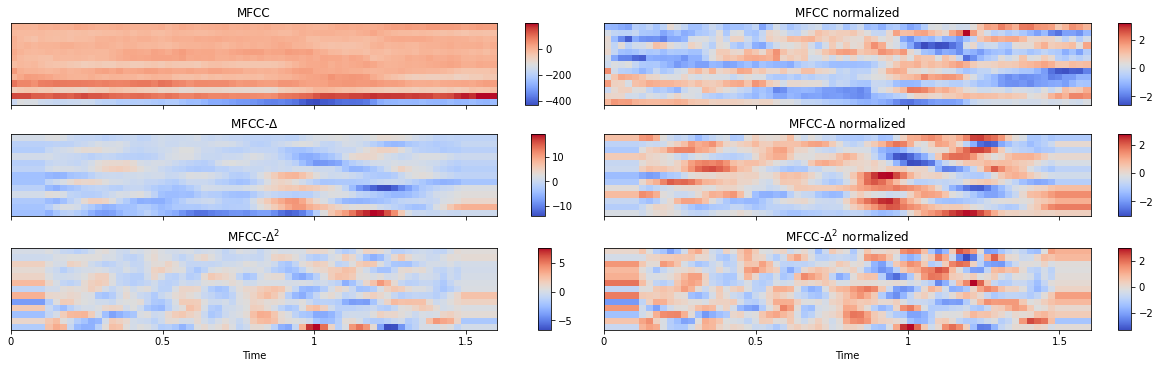

In [53]:
features_s,mfcc_s,mfcc_delta_s,mfcc_delta2_s = mfcc_scaler(feature,13,sklearn.preprocessing.StandardScaler())

fig, ax = plt.subplots(3,2,constrained_layout=True, sharex=True, sharey=True)

fig.set_size_inches(16,5)

img1 = display.specshow(mfcc, ax=ax[0][0], x_axis='time')
ax[0][0].set(title='MFCC')
ax[0][0].label_outer()
img2 = display.specshow(mfcc_delta, ax=ax[1][0], x_axis='time')
ax[1][0].set(title=r'MFCC-$\Delta$')
ax[1][0].label_outer()
img3 = display.specshow(mfcc_delta2, ax=ax[2][0], x_axis='time')
ax[2][0].set(title=r'MFCC-$\Delta^2$')
ax[2][0].label_outer()
fig.colorbar(img1, ax=[ax[0][0]])
fig.colorbar(img2, ax=[ax[1][0]])
fig.colorbar(img3, ax=[ax[2][0]])

img1 = display.specshow(mfcc_s, ax=ax[0][1], x_axis='time')
ax[0][1].set(title='MFCC normalized')
ax[0][1].label_outer()
img2 = display.specshow(mfcc_delta_s, ax=ax[1][1], x_axis='time')
ax[1][1].set(title=r'MFCC-$\Delta$ normalized')
ax[1][1].label_outer()
img3 = display.specshow(mfcc_delta2_s, ax=ax[2][1], x_axis='time')
ax[2][1].set(title=r'MFCC-$\Delta^2$ normalized')
ax[2][1].label_outer()
fig.colorbar(img1, ax=[ax[0][1]])
fig.colorbar(img2, ax=[ax[1][1]])
fig.colorbar(img3, ax=[ax[2][1]])

In [54]:
lastname_bymyself_features_normalized = []
for feature in lastname_bymyself_features:
    lastname_bymyself_features_normalized.append(mfcc_scaler(feature,13)[0])

<div dir="rtl">

اجرا DTW  بروی بردار های ویژگی صوت *بهنام* 

</div>

In [55]:
def features_dtw_calculation(y1,y2,is_equal=False,dtw_weight_path=None): 
    
    if(dtw_weight_path):
        return pd.read_excel(dtw_weight_path,index_col=0)
    
    record_number_y1 = len(y1)
    record_number_y2 = len(y2)
    
    if(is_equal):

        distances = np.zeros((record_number_y1, record_number_y2))
        for i in range(record_number_y1):
            for j in range(i+1, record_number_y2):

                D, wp = librosa.sequence.dtw(y1[i], y2[j])
                best_cost = D[-1, -1]
                distances[i][j] = round(best_cost, 3)

        distances = pd.DataFrame(distances)

        return distances

    distances = np.zeros((record_number_y1, record_number_y2))
    for i in range(record_number_y1):
        for j in range(record_number_y2):
            D, wp = librosa.sequence.dtw(y1[i], y2[j])
            best_cost = D[-1, -1]
            distances[i][j] = round(best_cost, 3)

    distances = pd.DataFrame(distances)
    
    return distances

<div dir="rtl">

همان طور که مشاهده میشود میزان مقادیر خروجی الگوریتم کاهش پیدا کرده قابل تفکیک پذیر تر شده است و همچنین از حجم پردازش به شکل قابل توجه کم شده است. 
</div>

In [56]:
features_distances_lastname_lastname_bymyself = features_dtw_calculation(lastname_bymyself_features_normalized,lastname_bymyself_features_normalized,is_equal=True,dtw_weight_path=lastname_bymyself_folder+'output/features_distances_lastname_lastname_bymyself.xlsx')
features_distances_lastname_lastname_bymyself

,0,1,2,3,4,5,6,7,8,9
0,0,331.926,362.141,480.141,377.399,382.911,375.612,639.533,436.869,425.664
1,0,0.000,369.588,466.638,429.371,428.425,429.445,641.180,443.073,498.624
2,0,0.000,0.000,504.535,443.913,443.711,437.591,720.702,480.701,484.635
3,0,0.000,0.000,0.000,535.273,542.801,566.456,771.841,589.041,499.466
4,0,0.000,0.000,0.000,0.000,261.122,332.673,624.341,466.935,422.429
5,0,0.000,0.000,0.000,0.000,0.000,325.496,588.321,438.715,473.469
6,0,0.000,0.000,0.000,0.000,0.000,0.000,574.382,451.596,510.216
7,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,615.293,722.774
8,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,552.971
9,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


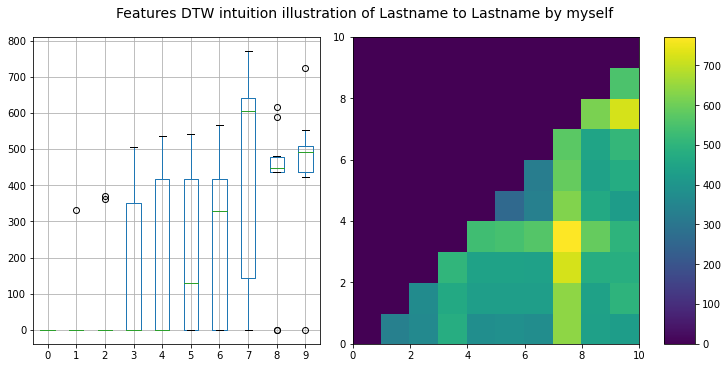

In [57]:
fig, ax = plt.subplots(1,2,constrained_layout=True)

fig.set_size_inches(10,5)
fig.suptitle("Features DTW intuition illustration of Lastname to Lastname by myself", fontsize=14)

features_distances_lastname_lastname_bymyself.boxplot(ax=ax[0])

img = ax[1].pcolormesh(features_distances_lastname_lastname_bymyself.to_numpy())
fig.colorbar(img, ax=[ax[1]])

In [58]:
# repoting out of dwt 
features_distances_lastname_lastname_bymyself.to_excel(lastname_bymyself_folder+'output/features_distances_lastname_lastname_bymyself.xlsx', engine='xlsxwriter')

<div dir="rtl">

دریافت صوت `سینا` توسط خودم 
</div>

record number :  10


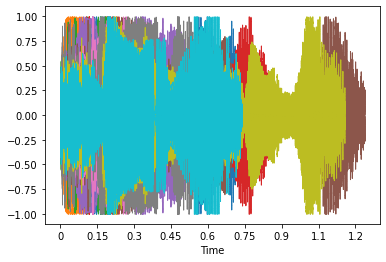

In [59]:
firstname_bymyself_folder = data + 'first_name_by_myself/'
firstname_bymyself_file = glob.glob(firstname_bymyself_folder+'*.wav')

firstname_bymyself = []
for firstname_path in firstname_bymyself_file:
    signal,samplerate = librosa.load(firstname_path,sr=22050,mono=True)
    signal,index = librosa.effects.trim(signal,top_db=10,frame_length=int(30e-3*samplerate),hop_length=int(10e-3*samplerate))
    display.waveshow(signal)
    firstname_bymyself.append([signal,samplerate])

print("record number : ",len(firstname_bymyself))

<div dir="rtl">

میزان شباهت صدا خام `سینا` با خودش 
</div>

In [60]:
signal_distances_firstname_bymyself = signal_dtw_calculation(firstname_bymyself,
firstname_bymyself,
dtw_weight_path=firstname_bymyself_folder+'output/signal_distances_firstname_firstname_bymyself.xlsx')

signal_distances_firstname_bymyself

,0,1,2,3,4,5,6,7,8,9
0,0,2109.323,2007.944,1789.689,1555.662,1807.638,1941.926,1999.109,2307.285,1444.116
1,0,0.000,1161.119,2069.439,1577.083,2522.635,1036.808,1915.698,2735.544,1709.328
2,0,0.000,0.000,1886.670,1644.274,2414.100,1107.257,1892.337,2539.966,1867.726
3,0,0.000,0.000,0.000,1860.474,1791.070,1989.821,1916.957,2010.343,1687.440
4,0,0.000,0.000,0.000,0.000,1886.188,1573.933,1647.217,2476.379,1481.490
5,0,0.000,0.000,0.000,0.000,0.000,2196.674,2131.059,2272.796,1739.960
6,0,0.000,0.000,0.000,0.000,0.000,0.000,1731.418,2512.765,1717.441
7,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2685.835,1654.975
8,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2270.118
9,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [61]:
# reporting dtw of firstname signal
signal_distances_firstname_bymyself.to_excel(firstname_bymyself_folder+'output/signal_distances_firstname_firstname_bymyself.xlsx', engine='xlsxwriter')

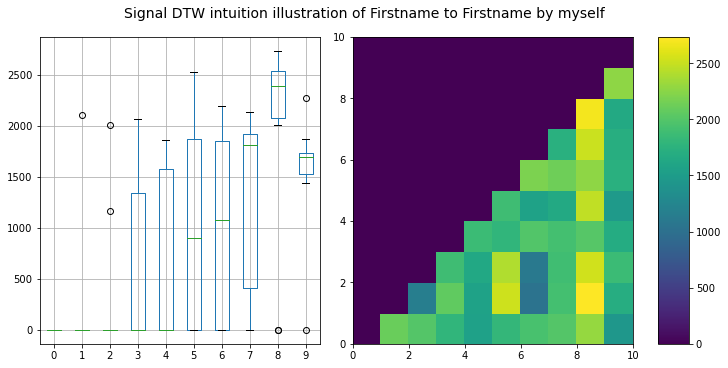

In [62]:
fig, ax = plt.subplots(1,2,constrained_layout=True)

fig.set_size_inches(10,5)
fig.suptitle("Signal DTW intuition illustration of Firstname to Firstname by myself", fontsize=14)

signal_distances_firstname_bymyself.boxplot(ax=ax[0])

img = ax[1].pcolormesh(signal_distances_firstname_bymyself.to_numpy())
fig.colorbar(img, ax=[ax[1]])

<div dir="rtl">

میزان شباهت صدای خامی که از دو صوت `سینا` , `بهنام` در یافت شده است  که توسط خودم ادا شده اند
</div>

In [63]:
signal_distances_firstname_lastname_bymyself = signal_dtw_calculation(lastname_bymyself,firstname_bymyself,is_equal=False,dtw_weight_path=data+'/signal_distances_firstname_lastname_bymyself.xlsx')

signal_distances_firstname_lastname_bymyself

,0,1,2,3,4,5,6,7,8,9
0,1683.990,1331.745,1446.639,2050.028,1445.512,2174.044,1433.124,1905.469,2408.824,1680.526
1,1667.015,1308.934,1411.346,2006.050,1463.842,2095.592,1368.548,1922.697,2410.367,1683.062
2,1767.681,1580.044,1539.985,2067.451,1539.071,2194.348,1585.854,1954.776,2465.376,1764.881
3,1864.580,1490.942,1442.202,2083.256,1677.484,2312.780,1451.244,2068.739,2480.803,1799.243
4,2146.921,880.820,1011.370,1961.151,1782.383,2686.503,1286.858,2128.173,2696.408,1941.140
5,2080.034,803.135,1203.037,2091.851,1620.318,2489.756,1279.260,1883.683,2696.833,1761.284
6,1806.885,1029.213,1296.860,1868.596,1454.998,2270.966,1342.774,2035.771,2449.069,1690.393
7,1976.403,1827.527,1684.776,2121.449,1748.571,2461.990,1771.982,2140.691,2766.273,1933.806
8,1930.396,1820.877,1673.176,2139.787,1655.915,2267.704,1658.031,2036.491,2605.619,1874.651
9,2106.205,1205.405,1336.449,2030.222,1763.672,2621.877,1621.840,2261.873,2434.738,1916.569


In [64]:
# reporting dtw of firstname to lastname signal
signal_distances_firstname_lastname_bymyself.to_excel(data+'/signal_distances_firstname_lastname_bymyself.xlsx', engine='xlsxwriter')

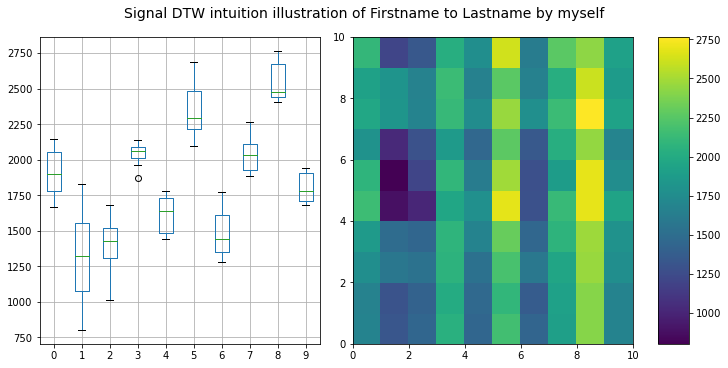

In [65]:
fig, ax = plt.subplots(1,2,constrained_layout=True)

fig.set_size_inches(10,5)
fig.suptitle("Signal DTW intuition illustration of Firstname to Lastname by myself", fontsize=14)

signal_distances_firstname_lastname_bymyself.boxplot(ax=ax[0])

img = ax[1].pcolormesh(signal_distances_firstname_lastname_bymyself.to_numpy())
fig.colorbar(img, ax=[ax[1]])

<div dir="rtl">

استخراج ویژگی ها از صوت `سینا` که توسط خودم گفته شده است 
</div>

In [66]:
# feature extraction 
frame_length = int(30e-3*samplerate) # 30ms
hop_length = int(10e-3*samplerate) # 10ms

firstname_bymyself_features = []

for signal,samplerate in firstname_bymyself:
    mfcc = librosa.feature.mfcc(signal,samplerate,n_mfcc=13,hop_length=hop_length,n_fft=frame_length,window=np.hamming(frame_length))
    mfcc_delta = librosa.feature.delta(mfcc)
    mfcc_delta2 = librosa.feature.delta(mfcc,order=2)
    zcr = librosa.feature.zero_crossing_rate(signal,frame_length=frame_length,hop_length=hop_length)
    rms = librosa.feature.rms(signal,frame_length=frame_length,hop_length=hop_length)
    feature = np.concatenate([mfcc,mfcc_delta,mfcc_delta2,zcr,rms])
    firstname_bymyself_features.append(feature)

firstname_bymyself_features[0].shape

(41, 81)

In [67]:
firstname_bymyself_features_normalized = []
for feature in firstname_bymyself_features:
    firstname_bymyself_features_normalized.append(mfcc_scaler(feature,13)[0])

<div dir="rtl">

میزان شباهت ویژگی ها صوت `سینا` با خود در حالتی که خودم ان را گفته ام
</div>

In [68]:
features_distances_firstname_bymyself = features_dtw_calculation(firstname_bymyself_features_normalized,
firstname_bymyself_features_normalized,
is_equal=True
)

features_distances_firstname_bymyself

,0,1,2,3,4,5,6,7,8,9
0,0.0,537.074,641.425,523.154,528.998,822.325,483.612,494.564,769.856,475.264
1,0.0,0.000,255.625,597.700,379.863,857.386,298.925,485.870,846.072,488.977
2,0.0,0.000,0.000,652.942,491.404,962.001,326.042,515.695,906.861,577.674
3,0.0,0.000,0.000,0.000,603.441,737.380,534.645,574.544,673.785,524.614
4,0.0,0.000,0.000,0.000,0.000,904.086,419.197,514.153,863.559,544.792
5,0.0,0.000,0.000,0.000,0.000,0.000,810.724,859.058,851.378,770.800
6,0.0,0.000,0.000,0.000,0.000,0.000,0.000,389.564,792.192,457.669
7,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,767.179,499.891
8,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,780.611
9,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [69]:
# reporting dtw features of firstname
features_distances_firstname_bymyself.to_excel(firstname_bymyself_folder+'output/features_distances_firstname_firstname_bymyself.xlsx', engine='xlsxwriter')

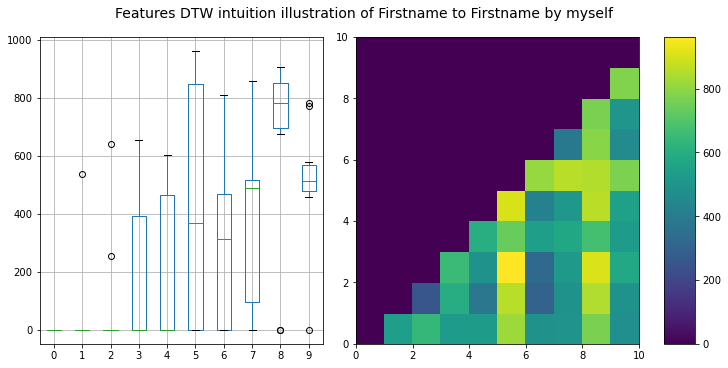

In [70]:
fig, ax = plt.subplots(1,2,constrained_layout=True)

fig.set_size_inches(10,5)
fig.suptitle("Features DTW intuition illustration of Firstname to Firstname by myself", fontsize=14)

features_distances_firstname_bymyself.boxplot(ax=ax[0])

img = ax[1].pcolormesh(features_distances_firstname_bymyself.to_numpy())
fig.colorbar(img, ax=[ax[1]])

<div dir="rtl">

میزان شباهت ویژگی های دو صوت `سینا` , `بهنام` توسط خودم
</div>

In [71]:
features_distances_firstname_lastname_bymyself = features_dtw_calculation(firstname_bymyself_features_normalized,
lastname_bymyself_features_normalized,
is_equal=False,
)

features_distances_firstname_lastname_bymyself

,0,1,2,3,4,5,6,7,8,9
0,573.708,587.288,586.202,628.375,610.116,580.514,640.521,778.305,681.801,624.250
1,409.907,464.811,484.947,588.269,248.228,273.103,382.165,640.759,518.260,496.348
2,502.635,531.510,558.181,641.016,300.282,339.459,436.104,728.520,591.045,545.732
3,695.310,715.048,713.209,721.083,671.635,665.952,695.776,757.583,708.281,699.372
4,499.246,487.400,505.216,634.670,460.445,422.831,455.434,661.933,508.308,605.500
5,934.651,962.004,938.641,944.313,909.255,916.215,956.999,938.953,965.198,906.021
6,441.475,475.089,509.989,630.806,338.976,332.576,416.862,701.207,552.711,529.449
7,531.370,560.476,577.187,661.232,534.838,520.248,544.806,737.326,594.522,596.658
8,915.752,923.223,908.835,938.404,906.432,896.392,878.446,909.446,899.625,901.717
9,548.807,575.685,559.487,627.083,552.553,515.694,599.128,737.851,630.126,582.386


In [72]:
# reporting dtw features of firstname to lastname
features_distances_firstname_lastname_bymyself.to_excel(data+'/features_distances_firstname_lastname_bymyself.xlsx', engine='xlsxwriter')

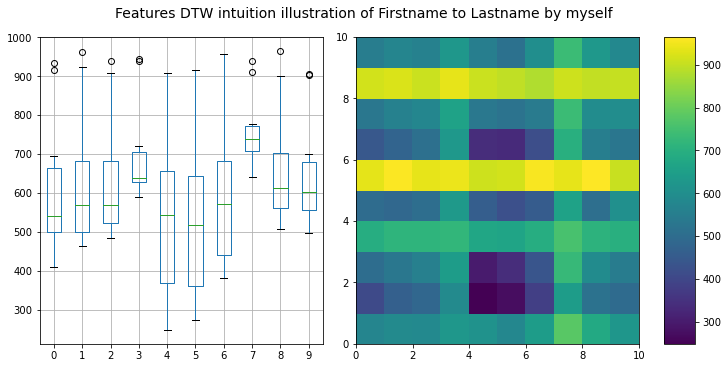

In [73]:
fig, ax = plt.subplots(1,2,constrained_layout=True)

fig.set_size_inches(10,5)
fig.suptitle("Features DTW intuition illustration of Firstname to Lastname by myself", fontsize=14)

features_distances_firstname_lastname_bymyself.boxplot(ax=ax[0])

img = ax[1].pcolormesh(features_distances_firstname_lastname_bymyself.to_numpy())
fig.colorbar(img, ax=[ax[1]])

<div dir="rtl">

دریافت اصوات ضبط شده توسط شخص دیگری برای صوت `سینا` 
</div>

record number :  10


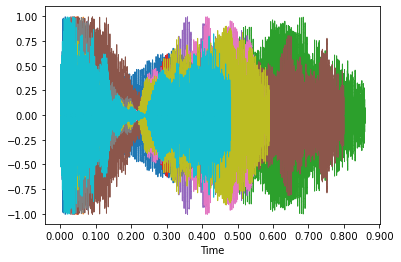

In [74]:
data = 'data/'
lastname_byperson1_folder = data + 'last_name_by_person1/'
lastname_byperson1_file = glob.glob(lastname_byperson1_folder+'*.wav')

lastname_byperson1 = []
for lastname_path in lastname_byperson1_file:
    signal,samplerate = librosa.load(lastname_path,sr=22050,mono=True)
    signal,index = librosa.effects.trim(signal,top_db=10,frame_length=int(30e-3*samplerate),hop_length=int(10e-3*samplerate))
    display.waveshow(signal)
    lastname_byperson1.append([signal,samplerate])

print("record number : ",len(lastname_byperson1))

<div dir="rtl">

میزان شباهت صوت خام `بهنام` در دو حالت ضبط شده توسط خودم و شخص دیگر 
</div>

In [75]:
signal_distances_lastname_lastname_byperson1_bymyself = signal_dtw_calculation(lastname_bymyself,
lastname_byperson1,
is_equal=False,
dtw_weight_path=data+'/signal_distances_lastname_lastname_bymyself_byperson1.xlsx',
)
signal_distances_lastname_lastname_byperson1_bymyself

,0,1,2,3,4,5,6,7,8,9
0,1093.370,1139.166,1431.301,1163.656,1149.364,1399.139,1286.686,1104.962,1239.657,1093.258
1,1011.884,1070.055,1363.176,1154.460,1136.845,1298.516,1183.857,1061.030,1164.003,1061.337
2,1199.646,1174.955,1433.299,1250.444,1176.793,1382.044,1336.931,1188.058,1329.753,1185.190
3,1250.232,1063.758,1565.835,1180.865,1290.616,1290.309,1456.031,1120.716,1373.393,1141.362
4,926.373,726.830,1527.580,964.799,1167.794,1276.690,1350.904,868.757,1181.328,774.128
5,979.292,930.708,1528.458,1047.452,1240.147,1458.596,1380.820,940.220,1283.803,912.148
6,858.966,881.287,1385.085,982.661,1082.064,1326.055,1209.281,893.420,1070.829,870.111
7,1280.243,1434.201,1538.592,1391.899,1346.179,1598.893,1473.042,1433.264,1410.567,1393.865
8,1361.012,1553.341,1511.239,1435.769,1462.340,1567.427,1365.234,1485.671,1354.899,1432.656
9,1134.591,887.228,1681.518,1094.907,1356.428,1328.916,1509.857,1033.947,1364.764,969.023


In [76]:
# reporting dtw signal of lastname to lastname by myself and person 1
signal_distances_lastname_lastname_byperson1_bymyself.to_excel(data+'/signal_distances_lastname_lastname_bymyself_byperson1.xlsx', engine='xlsxwriter')

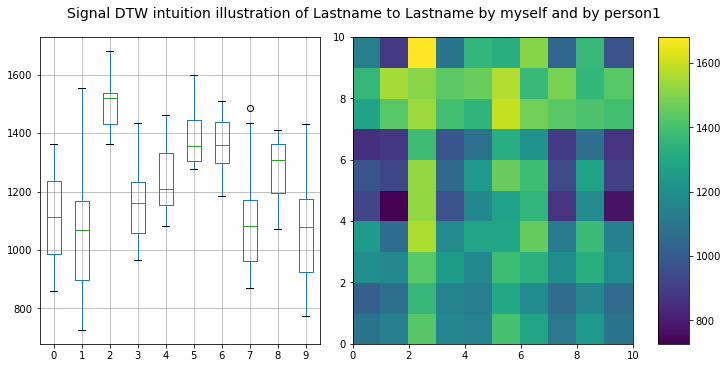

In [77]:
fig, ax = plt.subplots(1,2,constrained_layout=True)

fig.set_size_inches(10,5)
fig.suptitle("Signal DTW intuition illustration of Lastname to Lastname by myself and by person1", fontsize=14)

signal_distances_lastname_lastname_byperson1_bymyself.boxplot(ax=ax[0])

img = ax[1].pcolormesh(signal_distances_lastname_lastname_byperson1_bymyself.to_numpy())
fig.colorbar(img, ax=[ax[1]])

<div dir="rtl">

استخراج ویژگی صوت `بهنام` توسط گوینده دیگر
</div>

In [78]:
# feature extraction 
frame_length = int(30e-3*samplerate) # 30ms
hop_length = int(10e-3*samplerate) # 10ms

lastname_byperson1_features = []

for signal,samplerate in lastname_byperson1:
    mfcc = librosa.feature.mfcc(signal,samplerate,n_mfcc=13,hop_length=hop_length,n_fft=frame_length,window=np.hamming(frame_length))
    mfcc_delta = librosa.feature.delta(mfcc)
    mfcc_delta2 = librosa.feature.delta(mfcc,order=2)
    zcr = librosa.feature.zero_crossing_rate(signal,frame_length=frame_length,hop_length=hop_length)
    rms = librosa.feature.rms(signal,frame_length=frame_length,hop_length=hop_length)
    feature = np.concatenate([mfcc,mfcc_delta,mfcc_delta2,zcr,rms])
    lastname_byperson1_features.append(feature)

lastname_byperson1_features[0].shape

(41, 52)

In [79]:
# normalization 
lastname_byperson1_features_normalized = []
for feature in lastname_byperson1_features:
    lastname_byperson1_features_normalized.append(mfcc_scaler(feature,13)[0])

<div dir="rtl">

و همچنین میزان شباهت صوت `بهنام` توسط شخص دوم
</div>

In [80]:
features_distances_lastname_byperson1 = features_dtw_calculation(lastname_byperson1_features_normalized,
lastname_byperson1_features_normalized,
is_equal=True
)

features_distances_lastname_byperson1

,0,1,2,3,4,5,6,7,8,9
0,0.0,361.979,553.126,381.567,383.506,487.364,351.316,379.463,365.847,365.409
1,0.0,0.000,519.807,372.560,357.820,444.006,358.456,355.566,382.465,296.196
2,0.0,0.000,0.000,601.458,563.903,521.682,536.223,588.476,546.648,583.558
3,0.0,0.000,0.000,0.000,384.534,485.216,380.221,284.650,365.044,325.325
4,0.0,0.000,0.000,0.000,0.000,489.014,368.309,381.572,349.584,355.470
5,0.0,0.000,0.000,0.000,0.000,0.000,453.365,484.309,491.412,481.490
6,0.0,0.000,0.000,0.000,0.000,0.000,0.000,356.420,346.793,351.303
7,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,362.006,289.004
8,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,338.740
9,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


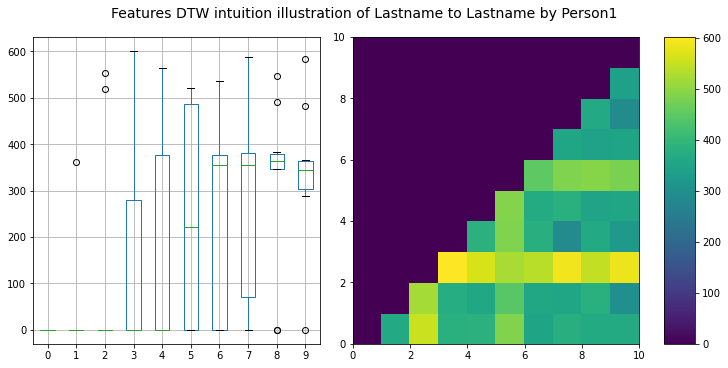

In [81]:
fig, ax = plt.subplots(1,2,constrained_layout=True)

fig.set_size_inches(10,5)
fig.suptitle("Features DTW intuition illustration of Lastname to Lastname by Person1", fontsize=14)

features_distances_lastname_byperson1.boxplot(ax=ax[0])

img = ax[1].pcolormesh(features_distances_lastname_byperson1.to_numpy())
fig.colorbar(img, ax=[ax[1]])

<div dir="rtl">

میزان شباهت ادای صوت `بهنام` توسط هر دو شخص
</div>

In [82]:
features_distances_lastname_byperson1_bymyself = features_dtw_calculation(lastname_bymyself_features_normalized,
lastname_byperson1_features_normalized,
is_equal=False
)

features_distances_lastname_byperson1_bymyself

,0,1,2,3,4,5,6,7,8,9
0,495.603,437.192,643.938,482.514,469.302,561.863,503.229,477.590,502.693,457.723
1,507.705,450.154,599.821,513.439,480.763,566.613,514.475,499.728,517.546,490.662
2,530.578,478.909,649.235,512.726,506.521,562.879,528.538,523.243,527.206,496.087
3,646.523,546.884,657.732,614.926,603.307,634.625,613.869,599.593,639.400,583.213
4,388.989,368.103,635.636,390.590,436.949,589.091,452.763,389.652,428.114,333.584
5,387.249,380.508,645.922,419.289,433.776,592.530,441.563,408.155,441.075,359.972
6,422.004,443.514,653.092,448.484,471.089,595.142,473.213,442.394,466.446,424.639
7,646.324,708.605,795.756,713.529,713.011,765.004,701.329,678.536,702.835,696.256
8,519.009,518.418,658.447,527.902,506.481,622.292,523.533,508.633,525.598,509.291
9,574.911,512.519,677.926,528.418,583.076,625.049,580.394,519.274,612.405,535.608


In [83]:
# reporting dtw features of lastname to lastname by myself and by person 1
features_distances_lastname_byperson1_bymyself.to_excel(data+'/features_distances_lastname_lastname_bymyself_byperson1.xlsx', engine='xlsxwriter')

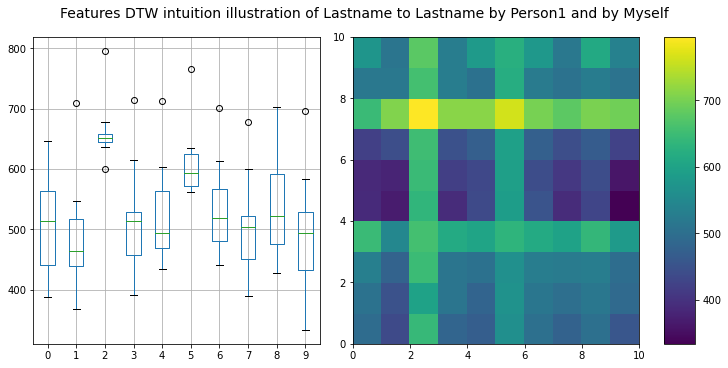

In [84]:
fig, ax = plt.subplots(1,2,constrained_layout=True)

fig.set_size_inches(10,5)
fig.suptitle("Features DTW intuition illustration of Lastname to Lastname by Person1 and by Myself", fontsize=14)

features_distances_lastname_byperson1_bymyself.boxplot(ax=ax[0])

img = ax[1].pcolormesh(features_distances_lastname_byperson1_bymyself.to_numpy())
fig.colorbar(img, ax=[ax[1]])

<div dir="rtl">

دریافت اصوات `سینا` توسط شخص دوم
</div>

record number :  10


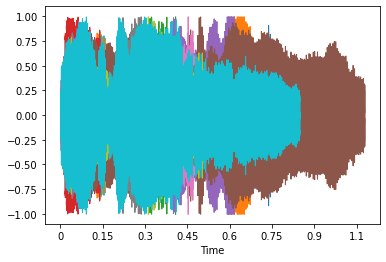

In [85]:
data = 'data/'
firstname_byperson1_folder = data + 'first_name_by_person1/'
firstname_byperson1_file = glob.glob(firstname_byperson1_folder+'*.wav')

firstname_byperson1 = []
for firstname_path in firstname_byperson1_file:
    signal,samplerate = librosa.load(firstname_path,sr=22050,mono=True)
    signal,index = librosa.effects.trim(signal,top_db=10,frame_length=int(30e-3*samplerate),hop_length=int(10e-3*samplerate))
    display.waveshow(signal)
    firstname_byperson1.append([signal,samplerate])

print("record number : ",len(firstname_byperson1))

<div dir="rtl">

میزان شباهت صوت خام `سینا` توسط هر دو شخص با هم دیگر
</div>

In [86]:
signal_distances_firstname_byperson1_bymyself = signal_dtw_calculation(firstname_bymyself,
firstname_byperson1,
is_equal=False,
dtw_weight_path=data+'/signal_distances_firstname_firstname_bymyself_byperson1.xlsx'
)
signal_distances_firstname_byperson1_bymyself

,0,1,2,3,4,5,6,7,8,9
0,2086.716,1903.531,1836.868,1760.762,1999.369,2436.289,1861.004,1922.193,1882.522,2121.177
1,1944.021,2116.721,1408.345,1256.753,2095.928,3848.010,1426.785,1322.640,1521.934,2348.935
2,1488.350,1808.980,1294.491,1492.111,1902.677,2832.330,1316.425,1294.384,1272.669,2177.299
3,2069.212,2113.530,1932.345,1770.957,2178.733,2735.479,1790.839,1868.809,1904.998,2151.490
4,1957.748,1665.229,1541.668,1500.131,1728.332,2230.331,1518.032,1545.600,1642.536,1766.049
5,2470.835,2237.613,2234.690,2078.468,2288.502,2703.441,2134.180,2352.086,2222.278,2449.408
6,1649.815,1773.992,1283.922,1566.821,1799.548,2806.806,1299.612,1363.392,1379.790,2169.014
7,2262.891,2228.416,1846.044,1935.144,2102.608,2617.360,1788.277,1868.235,1888.037,2108.149
8,2542.441,2444.097,2604.420,2262.996,2681.021,2923.246,2483.563,2509.345,2454.167,2637.705
9,2012.308,1945.717,1701.372,1714.913,1889.358,2609.226,1677.776,1765.544,1731.351,2094.376


In [87]:
# reporting dtw signal of firstname to firstname by myself and by person 1
signal_distances_firstname_byperson1_bymyself.to_excel(data+'/signal_distances_firstname_firstname_bymyself_byperson1.xlsx', engine='xlsxwriter')

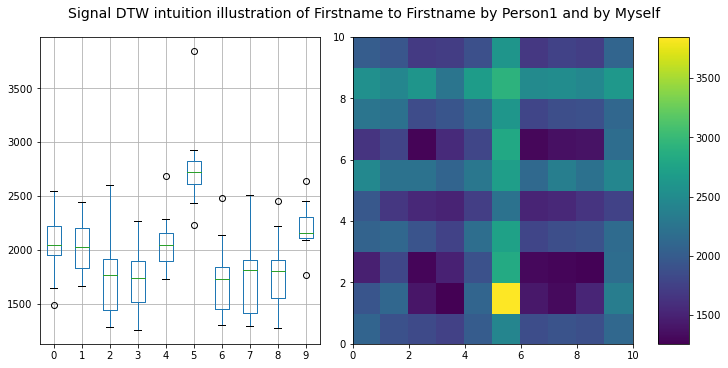

In [88]:
fig, ax = plt.subplots(1,2,constrained_layout=True)

fig.set_size_inches(10,5)
fig.suptitle("Signal DTW intuition illustration of Firstname to Firstname by Person1 and by Myself", fontsize=14)

signal_distances_firstname_byperson1_bymyself.boxplot(ax=ax[0])

img = ax[1].pcolormesh(signal_distances_firstname_byperson1_bymyself.to_numpy())
fig.colorbar(img, ax=[ax[1]])

<div dir="rtl">

استخراج ویژگی های صوت `سینا` توسط شخص دوم
</div>

In [89]:
# feature extraction 
frame_length = int(30e-3*samplerate) # 30ms
hop_length = int(10e-3*samplerate) # 10ms

firstname_byperson1_features = []

for signal,samplerate in firstname_byperson1:
    mfcc = librosa.feature.mfcc(signal,samplerate,n_mfcc=13,hop_length=hop_length,n_fft=frame_length,window=np.hamming(frame_length))
    mfcc_delta = librosa.feature.delta(mfcc)
    mfcc_delta2 = librosa.feature.delta(mfcc,order=2)
    zcr = librosa.feature.zero_crossing_rate(signal,frame_length=frame_length,hop_length=hop_length)
    rms = librosa.feature.rms(signal,frame_length=frame_length,hop_length=hop_length)
    feature = np.concatenate([mfcc,mfcc_delta,mfcc_delta2,zcr,rms])
    firstname_byperson1_features.append(feature)

firstname_byperson1_features[0].shape

(41, 86)

In [90]:
# normalization 
firstname_byperson1_features_normalized = []
for feature in firstname_byperson1_features:
    firstname_byperson1_features_normalized.append(mfcc_scaler(feature,13)[0])

<div dir="rtl">

میزان شباهت ادای صوت `سینا` توسط هر دو شخص
</div>

In [91]:
features_distances_firstname_byperson1_bymyself = features_dtw_calculation(firstname_bymyself_features_normalized,
firstname_byperson1_features_normalized,
is_equal=False
)

features_distances_firstname_byperson1_bymyself

,0,1,2,3,4,5,6,7,8,9
0,691.643,651.401,644.120,655.798,696.972,856.438,641.247,664.289,630.673,730.985
1,625.786,555.321,409.242,428.652,537.843,815.357,411.053,417.969,458.266,634.005
2,703.593,608.476,448.362,446.951,611.089,880.349,443.935,441.757,460.429,670.811
3,734.479,707.000,703.419,690.131,730.057,879.445,692.011,704.998,691.752,741.728
4,675.378,582.362,494.799,499.172,589.268,815.195,514.419,516.805,494.077,678.677
5,993.833,958.457,974.738,954.798,1010.243,1029.713,975.407,962.587,983.659,980.393
6,665.717,557.793,456.222,440.747,606.036,818.167,423.489,444.974,464.657,653.743
7,714.323,613.453,576.531,539.181,654.556,850.633,557.150,587.898,567.900,687.185
8,947.437,930.492,897.327,887.988,957.331,989.153,927.989,901.986,912.686,932.683
9,695.983,630.091,629.294,605.666,659.101,867.118,601.090,628.188,620.026,716.639


In [92]:
# reporting dtw features of firstname to firstname by myself and person 1
features_distances_firstname_byperson1_bymyself.to_excel(data+'/features_distances_firstname_firstname_bymyself_byperson1.xlsx', engine='xlsxwriter')

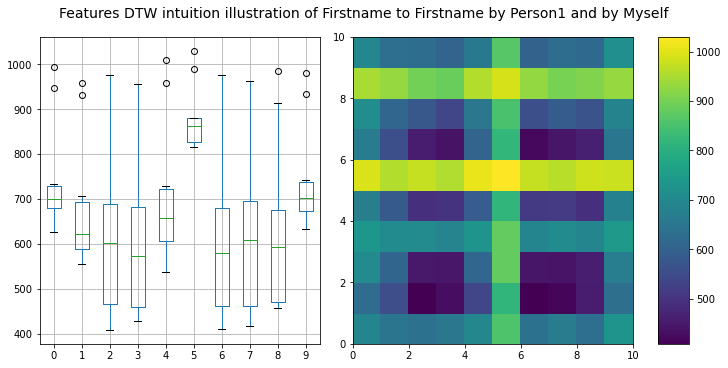

In [93]:
fig, ax = plt.subplots(1,2,constrained_layout=True)

fig.set_size_inches(10,5)
fig.suptitle("Features DTW intuition illustration of Firstname to Firstname by Person1 and by Myself", fontsize=14)

features_distances_firstname_byperson1_bymyself.boxplot(ax=ax[0])

img = ax[1].pcolormesh(features_distances_firstname_byperson1_bymyself.to_numpy())
fig.colorbar(img, ax=[ax[1]])

<div dir="rtl">

میزان تفاوت شباهت های اصوات `بهنام` در زمانی که خودم ان را نسبت به خودم ادا کرده ام و حالتی که گوینده دوم نسبت به خودم انرا دوباره ادا کرده است و در دو حالت سیگنال خام و بردار ویژگی ها که نشان از میزان متفاوت بودن هر یک از اصوات با ادای متفاوت توسط دو شخص را نمایش میدهد 

و همچنین میزان تفاوت در حالتی که با استفاده از بردار ویژگی و صوت خام صورت گرفته است را نشان میدهد

</div>

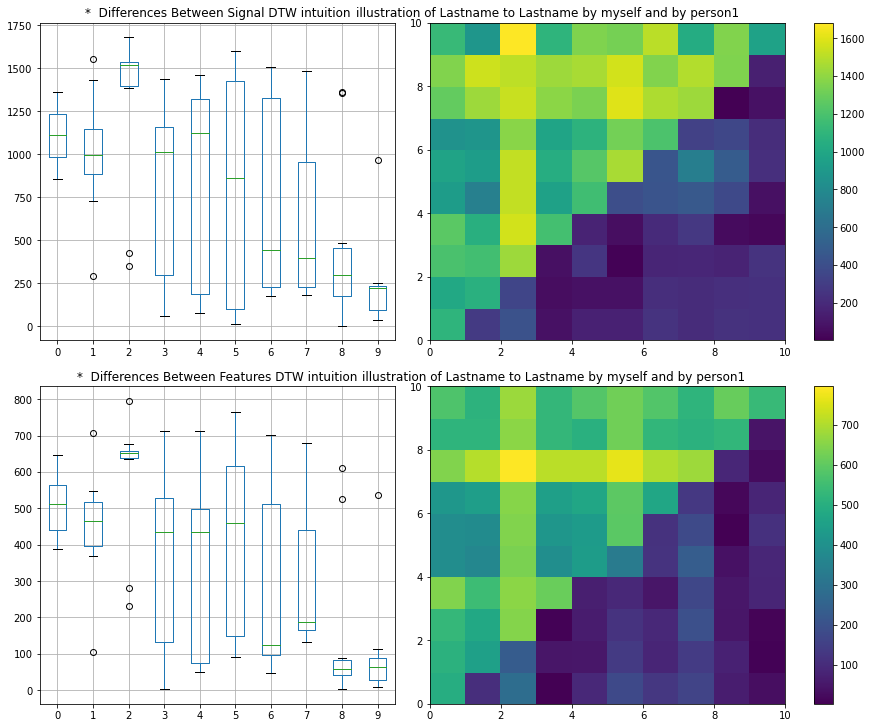

In [94]:
signal_lastname_difference = pd.DataFrame.abs(signal_distances_lastname_lastname_bymyself - signal_distances_lastname_lastname_byperson1_bymyself)

fig, ax = plt.subplots(2,2,constrained_layout=True)

fig.set_size_inches(12,10)
# fig.suptitle("Differences Between Signal DTW intuition illustration of Lastname to Lastname by myself and by person1", fontsize=14)

ax[0][0].set(title="*  Differences Between Signal DTW intuition")
ax[0][1].set(title="illustration of Lastname to Lastname by myself and by person1                               ")

signal_lastname_difference.boxplot(ax=ax[0][0])

img = ax[0][1].pcolormesh(signal_lastname_difference.to_numpy())
fig.colorbar(img, ax=[ax[0][1]])

features_lastname_difference = pd.DataFrame.abs(features_distances_lastname_lastname_bymyself - features_distances_lastname_byperson1_bymyself)

ax[1][0].set(title="*  Differences Between Features DTW intuition")
ax[1][1].set(title="illustration of Lastname to Lastname by myself and by person1                            ")

features_lastname_difference.boxplot(ax=ax[1][0])

img = ax[1][1].pcolormesh(features_lastname_difference.to_numpy())
fig.colorbar(img, ax=[ax[1][1]])

<div dir="rtl">

مانند بالا برای ادای صوت `سینا` 
</div>

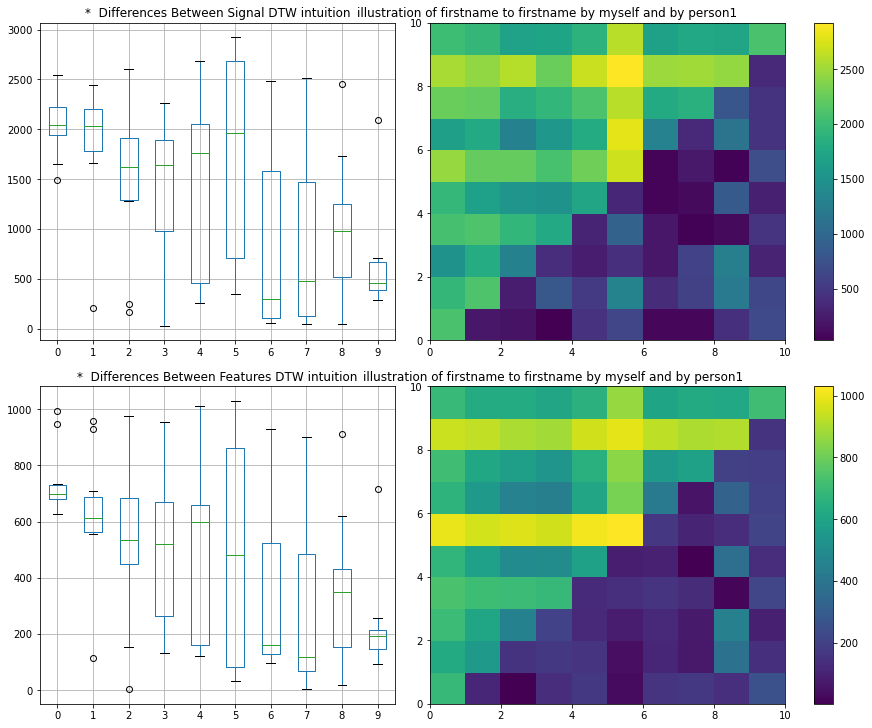

In [95]:
signal_firstname_difference = pd.DataFrame.abs(signal_distances_firstname_bymyself - signal_distances_firstname_byperson1_bymyself)

fig, ax = plt.subplots(2,2,constrained_layout=True)

fig.set_size_inches(12,10)
# fig.suptitle("Differences Between Signal DTW intuition illustration of firstname to firstname by myself and by person1", fontsize=14)

ax[0][0].set(title="*  Differences Between Signal DTW intuition")
ax[0][1].set(title="illustration of firstname to firstname by myself and by person1                               ")

signal_firstname_difference.boxplot(ax=ax[0][0])

img = ax[0][1].pcolormesh(signal_firstname_difference.to_numpy())
fig.colorbar(img, ax=[ax[0][1]])

features_firstname_difference = pd.DataFrame.abs(features_distances_firstname_bymyself - features_distances_firstname_byperson1_bymyself)

ax[1][0].set(title="*  Differences Between Features DTW intuition")
ax[1][1].set(title="illustration of firstname to firstname by myself and by person1                            ")

features_firstname_difference.boxplot(ax=ax[1][0])

img = ax[1][1].pcolormesh(features_firstname_difference.to_numpy())
fig.colorbar(img, ax=[ax[1][1]])